In [9]:

import pandas as pd #программная библиотека на языке Python для обработки и анализа данных.
import numpy as np #программная библиотека на языке Python для работы с многомерными массивам.
import  matplotlib.pyplot as plt # библиотека на языке программирования Python для визуализации данных двумерной графикой.
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns #библиотека на matplotlib. Предоставляет высокоуровневый интерфейс для рисования привлекательных и информативных статистических графиков.
import scipy.stats as sps #библиотека для языка программирования Python с открытым исходным кодом, предназначенная для выполнения научных и инженерных расчётов.

In [31]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Загрузка и предобработка данных

X = data.drop('DEATH_EVENT', axis=1).values
y = data['DEATH_EVENT'].values

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабирование признаков
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Определение класса модели
class HeartFailureModel(nn.Module):
    def __init__(self, input_size):
        super(HeartFailureModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

    def predict_proba(self, x):
        x = self.forward(x)
        return torch.sigmoid(x)

# Инициализация модели и оптимизатора
model = HeartFailureModel(X_train.shape[1])
optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = nn.BCEWithLogitsLoss()

# Обучение модели
epochs = 1000
batch_size = 50
for epoch in range(epochs):
    for i in range(0, X_train.shape[0], batch_size):
        X_batch = torch.tensor(X_train[i:i+batch_size], dtype=torch.float32)
        y_batch = torch.tensor(y_train[i:i+batch_size], dtype=torch.float32).view(-1, 1)
        
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()
    
    if epoch % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.10f}')

# Применение модели на тестовых данных и оценка точности
with torch.no_grad():
    probabilities = model.predict_proba(torch.tensor(X_test, dtype=torch.float32))
    predicted = (probabilities > 0.5).float()
    accuracy = (predicted == torch.tensor(y_test, dtype=torch.float32).view(-1, 1)).sum().item() / y_test.size
    print(f'Accuracy: {accuracy:.4f}')


NameError: name 'X_val' is not defined

In [69]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Загрузка и предобработка данных

X = data.drop('DEATH_EVENT', axis=1).values
y = data['DEATH_EVENT'].values

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабирование признаков
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Определение класса модели
class HeartFailureModel(nn.Module):
    def __init__(self, input_size):
        super(HeartFailureModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 8)
        self.fc3 = nn.Linear(8, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        # x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def predict_proba(self, x):
        x = self.forward(x)
        return torch.sigmoid(x)

# Инициализация модели и оптимизатора
model = HeartFailureModel(X_train.shape[1])
optimizer = optim.Adam(model.parameters(), lr=0.0001)
criterion = nn.BCEWithLogitsLoss()

# Обучение модели
epochs = 400
batch_size = 50
train_losses = []
val_losses = []
for epoch in range(epochs):
    for i in range(0, X_train.shape[0], batch_size):
        X_batch = torch.tensor(X_train[i:i+batch_size], dtype=torch.float32)
        y_batch = torch.tensor(y_train[i:i+batch_size], dtype=torch.float32).view(-1, 1)
        
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()
    
    with torch.no_grad():
        model.eval()  # Переключение модели в режим оценки
        # Оценка потерь на валидационных данных
        X_val = torch.tensor(X_test, dtype=torch.float32)
        y_val = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)
        y_val_pred = model(X_val)
        val_loss = criterion(y_val_pred, y_val)
        val_losses.append(val_loss.item())
        model.train()  # Переключение модели в режим обучения
    
    train_losses.append(loss.item())

    if epoch % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.10f}, Val Loss: {val_loss.item():.10f}')

# Применение модели на тестовых данных и оценка точности
with torch.no_grad():
    probabilities = model.predict_proba(torch.tensor(X_test, dtype=torch.float32)).view(-1)
    predictions = (probabilities >= 0.5).float().view(-1)
    accuracy = torch.sum(predictions == torch.tensor(y_test, dtype=torch.float32)) / len(y_test)
    print(f'Test Accuracy: {accuracy.item():.4f}')

import matplotlib.pyplot as plt

plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()



TypeError: estimator should be an estimator implementing 'fit' method, HeartFailureModel(
  (fc1): Linear(in_features=12, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=8, bias=True)
  (fc3): Linear(in_features=8, out_features=1, bias=True)
) was passed

In [70]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, Dataset

# Define the CNN model
class HeartFailureNet(nn.Module):
    def __init__(self):
        super(HeartFailureNet, self).__init__()
        self.conv1 = nn.Conv1d(1, 64, kernel_size=3)
        self.conv2 = nn.Conv1d(64, 128, kernel_size=3)
        self.conv3 = nn.Conv1d(128, 256, kernel_size=3)
        self.pool = nn.MaxPool1d(2)
        self.fc1 = nn.Linear(256 * 14, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 2)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = F.relu(self.conv3(x))
        x = self.pool(x)
        x = x.view(-1, 256 * 14)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


# Define a custom dataset for heart failure data
class HeartFailureDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)
        
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, index):
        return {'inputs': self.X[index], 'labels': self.y[index]}

# Load and preprocess your data
# X, y = load_and_preprocess_data(...)  # Your data loading and preprocessing code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create dataset and dataloader for training and testing
train_dataset = HeartFailureDataset(X_train, y_train)
test_dataset = HeartFailureDataset(X_test, y_test)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Initialize the CNN model
model = HeartFailureNet()

# Define a custom predict_proba function
def predict_proba(model, dataloader):
    model.eval()
    probs = []
    with torch.no_grad():
        for batch in dataloader:
            inputs = batch['inputs'].float()
            outputs = model(inputs)
            probs.append(torch.softmax(outputs, dim=1).detach().numpy())
    probs = np.concatenate(probs, axis=0)
    return probs
# Train the model
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
epochs = 10
for epoch in range(epochs):
    model.train()
    for batch in train_dataloader:
        inputs = batch['inputs'].float()
        labels = batch['labels']
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    
    # Evaluate the model after each epoch
    model.eval()
    with torch.no_grad():
        probs, true_labels = predict_proba(model, test_dataloader)
        predicted_labels = np.argmax(probs, axis=1)
        accuracy = accuracy_score(true_labels, predicted_labels)
        print(f'Epoch {epoch+1}, Accuracy: {accuracy:.4f}')


RuntimeError: Given groups=1, weight of size [64, 1, 3], expected input[1, 32, 12] to have 1 channels, but got 32 channels instead

In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset

class HeartFailureNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(HeartFailureNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size, output_size)
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.softmax(x)
        return x
    
class HeartFailureDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
        
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        x = torch.tensor(self.X[idx], dtype=torch.float32)
        y = torch.tensor(self.y[idx], dtype=torch.long)
        return x, y

class HeartFailureModel():
    def __init__(self, input_size, hidden_size, output_size):
        self.model = HeartFailureNet(input_size, hidden_size, output_size)
        
    def train(self, X_train, y_train, epochs, batch_size, lr):
        self.model.train()
        dataset = HeartFailureDataset(X_train, y_train)
        dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(self.model.parameters(), lr=lr)
        
        for epoch in range(epochs):
            for i, (inputs, labels) in enumerate(dataloader):
                optimizer.zero_grad()
                outputs = self.model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
                
    def predict_proba(self, X):
        self.model.eval()
        with torch.no_grad():
            inputs = torch.tensor(X, dtype=torch.float32)
            outputs = self.model(inputs)
            return outputs.numpy()

    def predict(self, X):
        proba = self.predict_proba(X)
        return proba.argmax(axis=1)

# Пример использования
# Создание и обучение модели
input_size = 12  # Размер входных признаков
hidden_size = 64  # Размер скрытого слоя
output_size = 2  # Количество классов (двоичная классификация)
epochs = 100  # Количество эпох обучения
batch_size = 32  # Размер пакета данных для обучения
lr = 0.001  # Скорость обучения

# Создание экземпляра модели
model = HeartFailureModel(input_size, hidden_size, output_size)

# Обучение модели
model.train(X_train, y_train, epochs, batch_size, lr)

# Пример использования (продолжение)
# Прогнозирование классов и вероятностей классов
X_test = ...  # Тестовые данные
y_pred = model.predict(X_test)  # Прогнозирование классов
y_proba = model.predict_proba(X_test)  # Прогнозирование вероятностей классов

# Вывод результатов
print("Predicted Classes:", y_pred)
print("Predicted Probabilities:", y_proba)

TypeError: must be real number, not ellipsis

In [10]:
data=pd.read_csv('archive\heart_failure_clinical_records_dataset.csv')
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [11]:
X, y = data.drop(columns='DEATH_EVENT'), data['DEATH_EVENT']

# split the data into training and test samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
print(type(X_train))
sc = StandardScaler()
num_cols = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']

X_train[num_cols] = sc.fit_transform(X_train[num_cols])
X_test[num_cols] = sc.transform(X_test[num_cols])

<class 'pandas.core.frame.DataFrame'>


In [14]:
import torch
import torch.nn as nn
import torch.optim as optim

# Определение класса модели
class HeartFailureModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(HeartFailureModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        output = self.sigmoid(x)
        return output

# Инициализация модели
input_size = 12  # количество признаков в датасете
hidden_size = 64  # количество нейронов в скрытых слоях
output_size = 1  # количество классов (в данном случае 1, так как задача бинарной классификации)
model = HeartFailureModel(input_size, hidden_size, output_size)

# Определение функции потерь и оптимизатора
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Процесс обучения модели (пример)
num_epochs = 100
for epoch in range(num_epochs):
    # Получение предсказаний модели
    outputs = model(X_train)  # X_train - входные данные
    loss = criterion(outputs, y_train)  # y_train - целевые метки
    
    # Обратное распространение ошибки и оптимизация
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Вывод значения функции потерь на каждой эпохе
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Применение модели на тестовых данных и оценка точности
with torch.no_grad():
    outputs = model(X_test)  # X_test - тестовые данные
    predicted = (outputs > 0.5).float()
    accuracy = (predicted == y_test).sum().item() / y_test.size(0)
    print(f'Accuracy: {accuracy:.4f}')


TypeError: linear(): argument 'input' (position 1) must be Tensor, not DataFrame

In [3]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


In [4]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [5]:
data.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

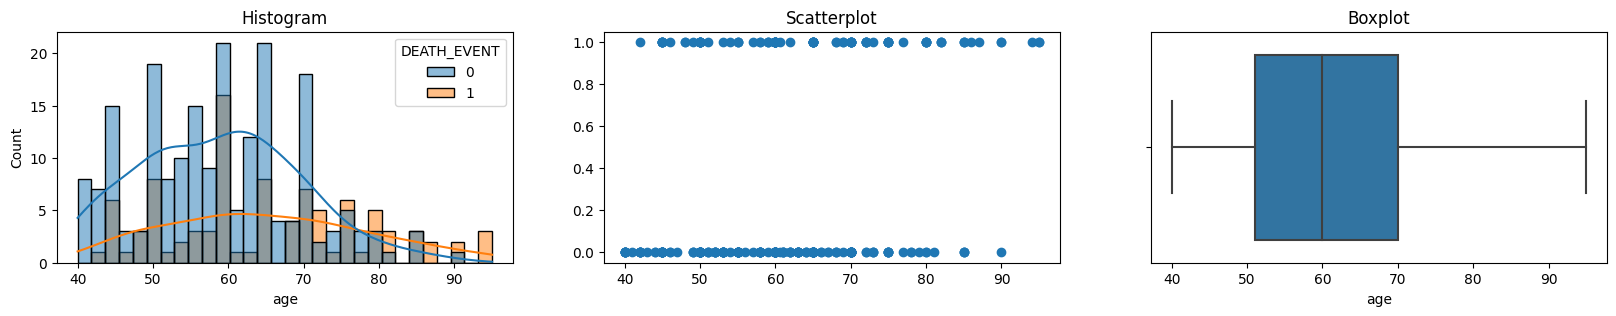

age


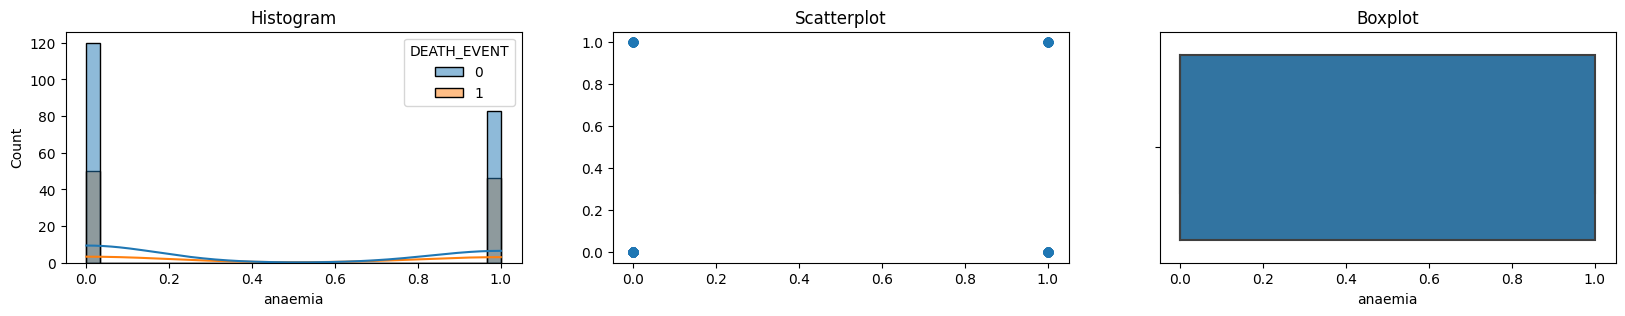

anaemia


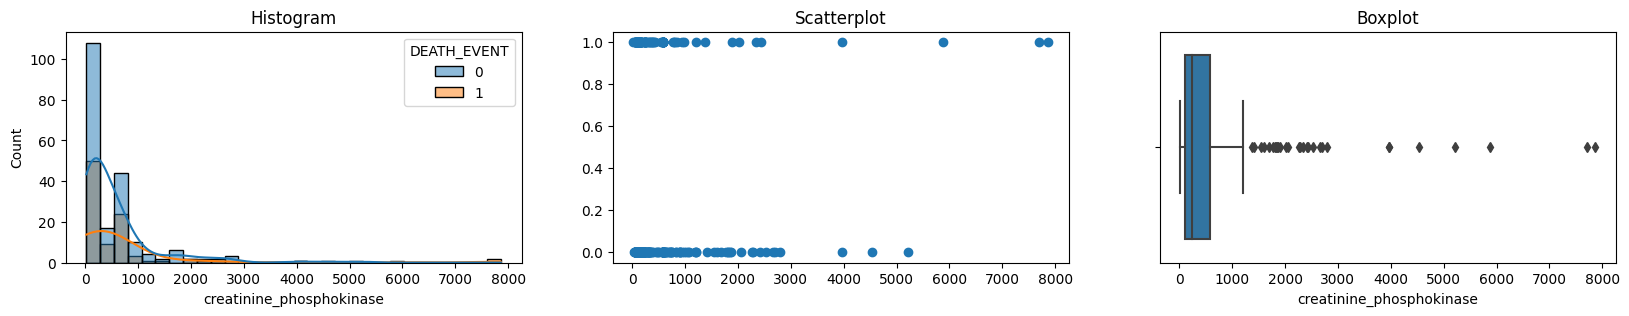

creatinine_phosphokinase


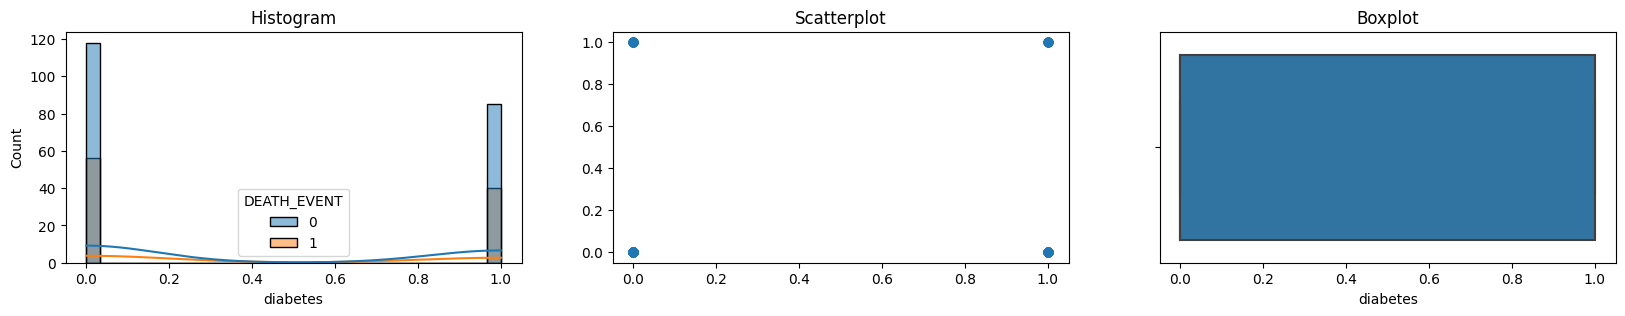

diabetes


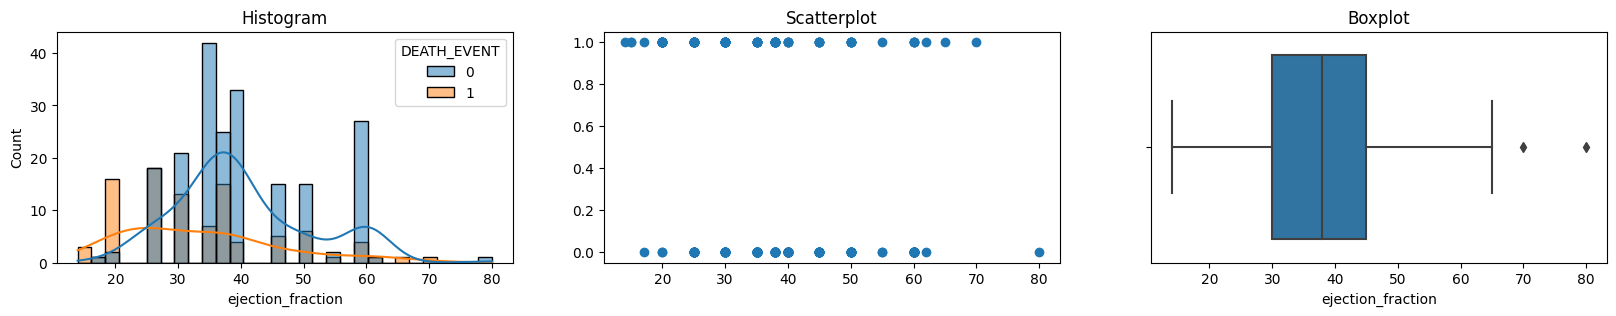

ejection_fraction


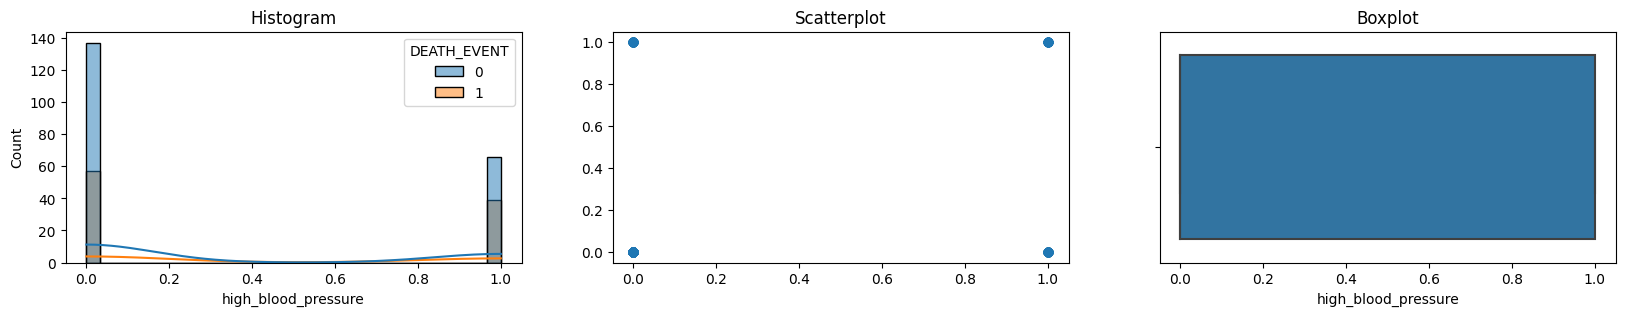

high_blood_pressure


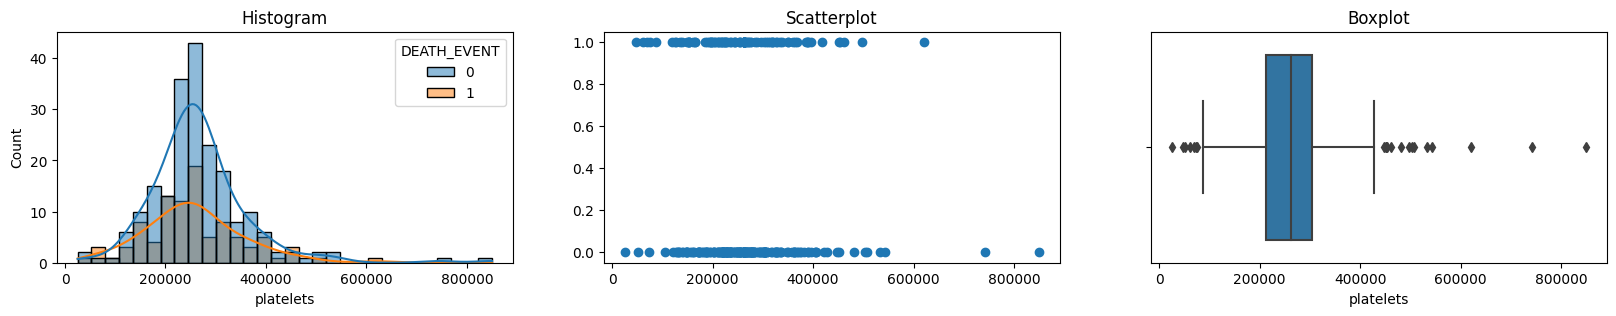

platelets


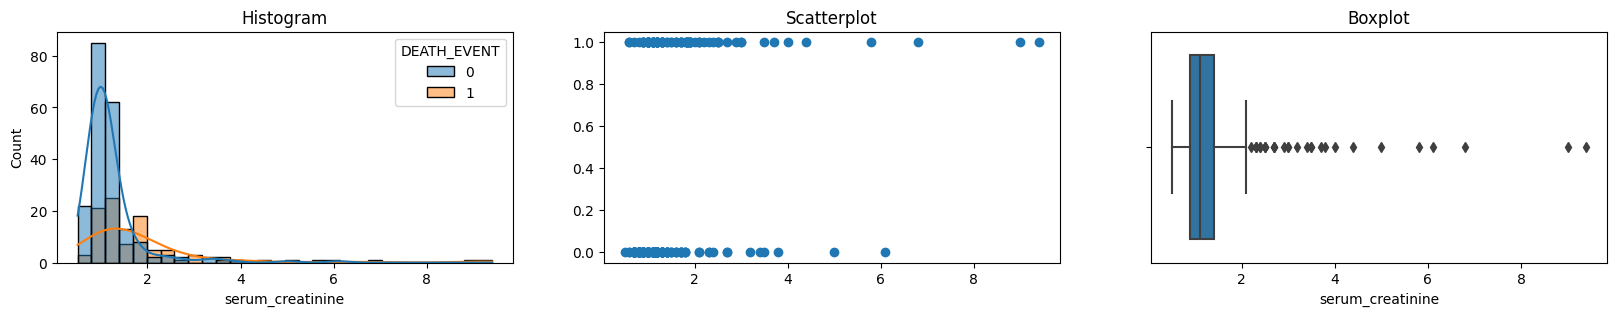

serum_creatinine


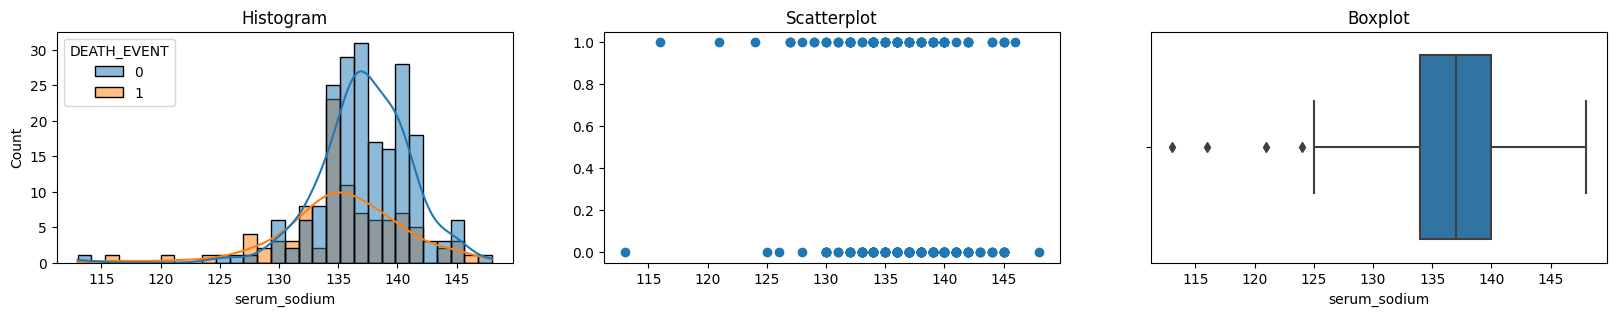

serum_sodium


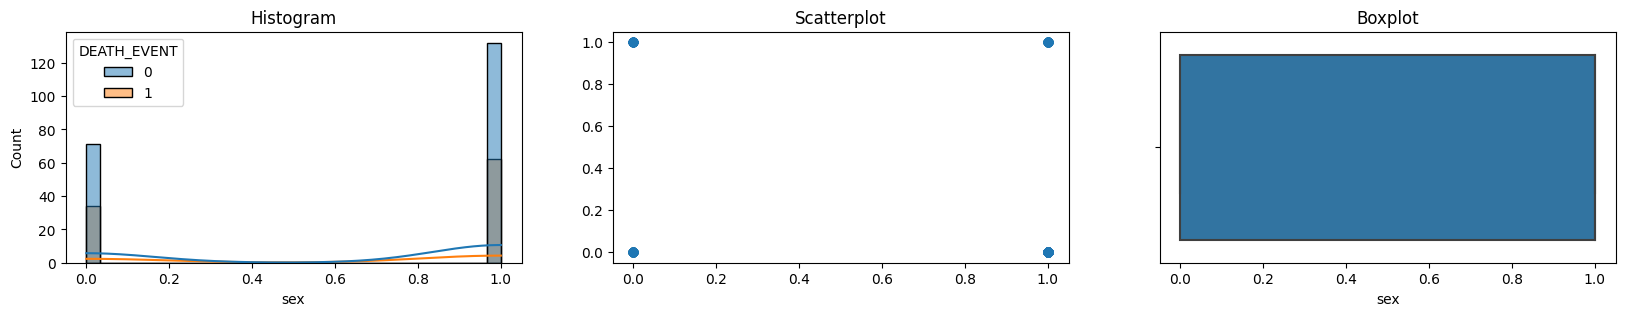

sex


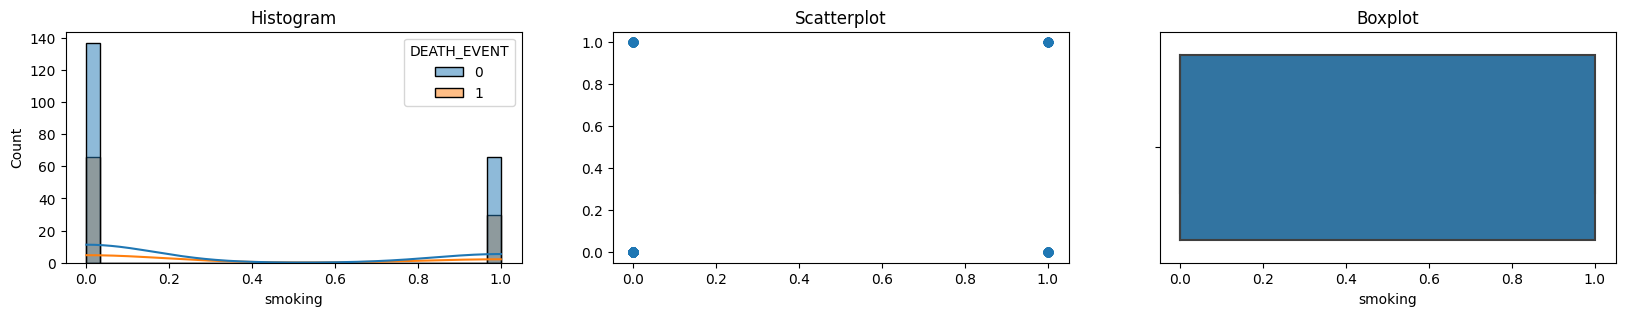

smoking


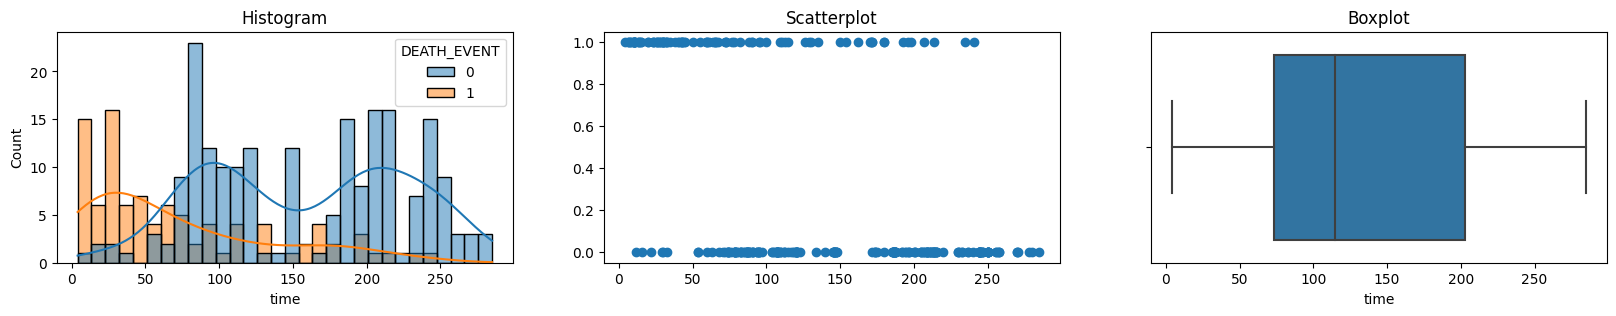

time


In [6]:
def show_plots(data, feature, label):
    
    plt.figure(figsize=(20, 3))
    
    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(data=data, x=feature, hue=label, bins=30, kde=True)
    plt.title('Histogram')


    # scatterplot
    plt.subplot(1, 3, 2)
    plt.scatter(data[feature], data[label])
    plt.title('Scatterplot')
    
    
    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(x=data[feature])
    plt.title('Boxplot')
    
    
    plt.show()

for col in data.columns[:-1]:
    show_plots(data, col, data.columns[-1])
    print(col)

Тепловая карта корреляции


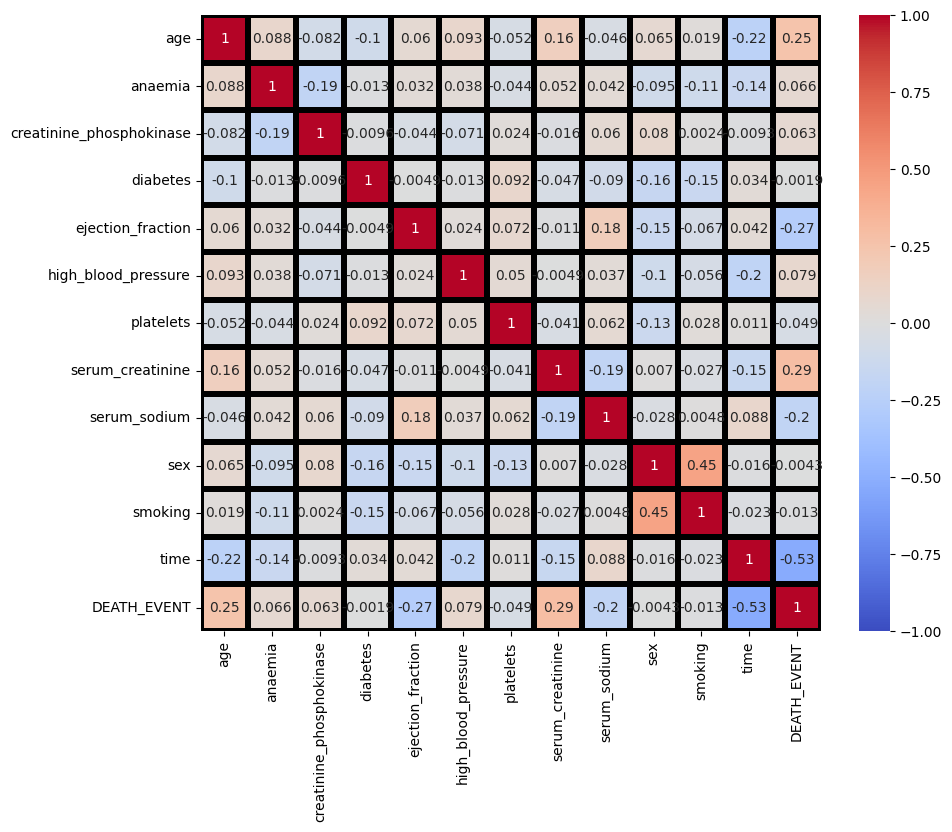

In [7]:
print("Тепловая карта корреляции")
sns.heatmap(data.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3, linecolor='black')
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [8]:
cols = data.columns
for i in cols:
    print(i.capitalize())
    print('Number of unique data:',data[i].nunique())
    print("Value Counts")
    print(data[i].value_counts())
    print("")
    print("****************************************************************************************************")
    print("")

Age
Number of unique data: 47
Value Counts
60.000    33
50.000    27
65.000    26
70.000    25
45.000    19
55.000    17
75.000    11
53.000    10
58.000    10
63.000     8
80.000     7
72.000     7
40.000     7
42.000     7
85.000     6
68.000     5
52.000     5
62.000     5
51.000     4
59.000     4
61.000     4
73.000     4
49.000     4
69.000     3
46.000     3
64.000     3
82.000     3
90.000     3
78.000     2
60.667     2
54.000     2
77.000     2
57.000     2
66.000     2
44.000     2
67.000     2
95.000     2
48.000     2
43.000     1
86.000     1
81.000     1
79.000     1
41.000     1
94.000     1
87.000     1
47.000     1
56.000     1
Name: age, dtype: int64

****************************************************************************************************

Anaemia
Number of unique data: 2
Value Counts
0    170
1    129
Name: anaemia, dtype: int64

****************************************************************************************************

Creatinine_phosphokinase

In [9]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [11]:
X_train

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
5,2.397260,1,-0.524024,0,0.153066,1,-0.578382,0.594540,-1.012859,1,1,-1.547057
102,1.569089,0,0.269843,0,-1.098275,0,-1.165326,-0.305001,1.627844,1,1,-0.530318
38,-0.087254,0,1.909818,1,-0.681162,0,0.499462,0.774448,0.087434,1,0,-1.263915
95,-0.252888,1,-0.443798,0,1.821521,1,-0.418306,-0.394955,0.967668,1,0,-0.581798
67,0.906552,1,-0.465253,0,-1.098275,0,0.168639,-0.394955,0.747609,1,1,-0.813460
...,...,...,...,...,...,...,...,...,...,...,...,...
203,-0.087254,0,-0.512829,0,-1.098275,1,-0.493008,1.853897,-0.132625,1,1,0.756694
255,-0.749791,1,-0.389691,1,-0.681162,1,0.808942,-0.394955,1.187727,1,1,1.129928
72,1.983175,0,4.919237,0,-0.264048,0,-0.162184,-0.394955,-1.012859,1,1,-0.723370
235,1.320638,1,-0.466186,0,0.987293,1,1.577306,-0.305001,0.087434,1,0,1.039837


In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

# Загружаем датасет
data = data

X = data.drop('DEATH_EVENT', axis=1)
y = data['DEATH_EVENT']
# Разделяем данные на признаки и целевую переменную
# X = OneHotEncoder().fit_transform(X)
# print(X)

# Разделяем данные на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Стандартизируем данные
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.values)
X_test = scaler.transform(X_test.values)

# Обучаем модель логистической регрессии и подбираем оптимальные параметры с помощью GridSearchCV
lr = LogisticRegression(max_iter=100000)
param_grid = {
    'C': [0.0001,0.001, 0.01, 0.1, 1.0 ,2.0,3.0, 10, 50, 100, 1000, 10000]
}
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_lr = grid_search.best_estimator_
print(best_lr)
# Прогнозируем значения на тестовом наборе и оцениваем точность модели
y_pred = best_lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Делаем прогноз на 5 новых значений
X_new = np.array([[75.0, 0,	582,	0,	20,	1,	265000.00,	1.9,	130,	1,	0,	4],
                  [62.0,	0,	61,	1,	38,	1,	155000.00,	1.1,	143,	1,	1,	270]])
X_new = scaler.transform(X_new)
y_new_proba = best_lr.predict_proba(X_new)[:, 1]
print(f"Predicted probabilities of death event:\n{y_new_proba}")

accuracies = cross_val_score(estimator = best_lr, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

LogisticRegression(max_iter=100000)
Accuracy: 0.8000
Predicted probabilities of death event:
[0.9701435 0.0072668]
Accuracy: 83.64 %
Standard Deviation: 10.21 %


<AxesSubplot: title={'center': 'Feature Importance'}>

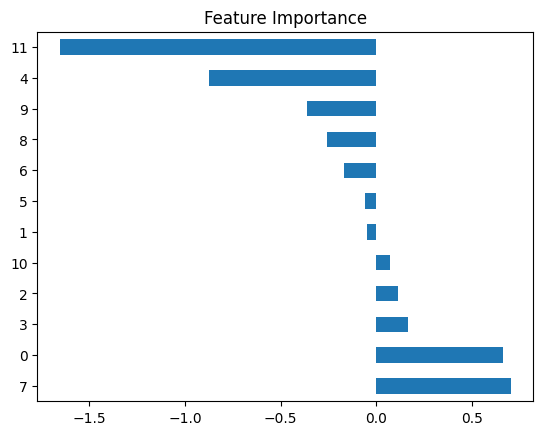

In [25]:
importance = best_lr.coef_[0]
feat_importances = pd.Series(importance)
feat_importances.nlargest(20).plot(kind='barh',title = 'Feature Importance')

<AxesSubplot: xlabel='age_group', ylabel='count'>

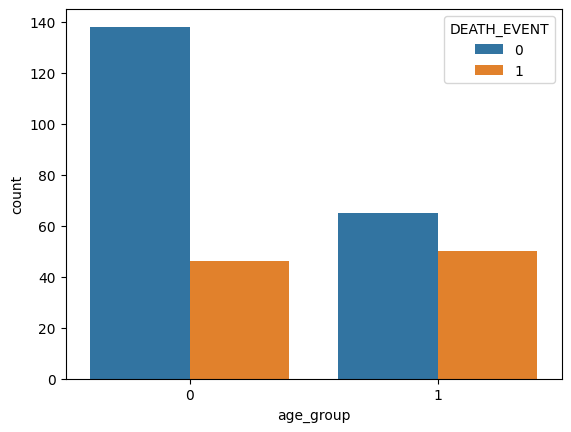

In [13]:
# function to calulcate the upper limit and lower limit from IQR
def outlier_limits(data, col):
    Q3 = data[col].quantile(0.75)
    Q1 = data[col].quantile(0.25)
    IQR = Q3 - Q1
    UL = Q3 + 1.5*IQR
    LL = Q1 - 1.5*IQR
    return UL, LL
    
# replacing outliers with either upper_limit (if outlier is greater than UL) or lower_limit (if outlier is less than LL)
for col in ['creatinine_phosphokinase', 'platelets', 'serum_creatinine']:
    UL, LL = outlier_limits(data, col)
    data[col] = np.where((data[col] > UL), UL, data[col])
    data[col] = np.where((data[col] < LL), LL, data[col])

data['age_group'] = np.nan
data.loc[(data['age'] < 65), 'age_group'] = 0
data.loc[(data['age'] >= 65), 'age_group'] = 1

sns.countplot(data=data, x='age_group', hue='DEATH_EVENT', order=[0, 1])

In [14]:
#Logistic Regression
clf = LogisticRegression(random_state=1)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

# applying k-fold cross validation
accuracies = cross_val_score(estimator = clf, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

[[34  1]
 [11 14]]
0.8
Accuracy: 83.64 %
Standard Deviation: 10.21 %


In [15]:
X_new = np.array([[75.0, 0,	582,	0,	20,	1,	265000.00,	1.9,	130,	1,	0,	4]])
X_new = scaler.transform(X_new)
y_new_proba = best_lr.predict_proba(X_new)[:, 1]
print(f"Predicted probabilities of death event:\n{y_new_proba}")


Predicted probabilities of death event:
[0.9701435]


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Загрузка данных и разделение на признаки и целевую переменную
data = data
X = data.drop("DEATH_EVENT", axis=1)
y = data["DEATH_EVENT"]

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели с помощью GridSearchCV
rf = RandomForestClassifier(random_state=42)
param_grid = {
    "n_estimators": [100, 300, 500],
    "max_depth": [3, 5, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}
grid_search = GridSearchCV(rf, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Выбор лучших параметров и создание модели с ними
best_rf = grid_search.best_estimator_

best_rf.fit(X_train, y_train)

# Оценка точности модели на тестовой выборке
y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, (y_pred > 0.5))
print(f"Accuracy: {accuracy}")


Accuracy: 0.75


In [17]:
y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred.round())
print(f"Accuracy: {accuracy}")

Accuracy: 0.75


In [18]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

data = data
X = data.drop("DEATH_EVENT", axis=1)
y = data["DEATH_EVENT"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Стандартизируем данные
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train.values)
# X_test = scaler.transform(X_test.values)
sc = StandardScaler()
num_cols = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']

X_train[num_cols] = sc.fit_transform(X_train[num_cols])
X_test[num_cols] = sc.transform(X_test[num_cols])

print(X_train)

knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
# param_grid = {'n_neighbors': [3, 5, 7, 10, 15], 'weights': ['uniform', 'distance']}
# grid_search = GridSearchCV(knn, param_grid, cv=5)
# grid_search.fit(X_train, y_train)
knn.fit(X_train, y_train)
# best = grid_search.best_estimator_

# best.fit(X_train, y_train)

knn.fit(X_train, y_train)
# Оценка точности модели на тестовой выборке
# y_pred = best.predict(X_test)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred )
print(accuracy)

X_new = np.array([[75.0, 0,	582,	0,	20,	1,	265000.00,	1.9,	130,	1,	0,	4]])
X_new = scaler.transform(X_new)
# y_new_proba = best.predict_proba(X_new)[:, 1]
y_new_proba = knn.predict_proba(X_new)[:, 1]
print(f"Predicted probabilities of death event:\n{y_new_proba}")

          age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
6    1.164202        1                 -0.445797         0          -2.000867   
183  1.164202        0                 -0.823863         0          -0.022672   
185 -0.032819        1                 -0.811004         1          -0.710740   
146 -0.756645        0                 -0.738991         0          -0.710740   
30   2.750989        0                  0.418356         1          -0.022672   
..        ...      ...                       ...       ...                ...   
188 -0.032819        1                 -0.690126         1           0.149345   
71  -0.255554        0                  0.418356         1          -0.280697   
106 -0.506099        0                  0.845289         0           0.579388   
270 -1.424765        0                  0.418356         1          -0.710740   
102  1.581778        0                  1.231071         0          -1.140782   

     high_blood_pressure  p

c:\Users\Дмитрий\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


ValueError: X has 12 features, but KNeighborsClassifier is expecting 13 features as input.